# Homework-X2: MLP for MNIST Classification

### In this homework, you need to
- #### implement SGD optimizer (`./optimizer.py`)
- #### implement forward and backward for FCLayer (`layers/fc_layer.py`)
- #### implement forward and backward for SigmoidLayer (`layers/sigmoid_layer.py`)
- #### implement forward and backward for ReLULayer (`layers/relu_layer.py`)
- #### implement EuclideanLossLayer (`criterion/euclidean_loss.py`)
- #### implement SoftmaxCrossEntropyLossLayer (`criterion/softmax_cross_entropy.py`)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow.compat.v1 as tf
tf.disable_eager_execution()

from network import Network
from solver import train, test
from plot import plot_loss_and_acc

## Load MNIST Dataset
We use tensorflow tools to load dataset for convenience.

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
def decode_image(image):
    # Normalize from [0, 255.] to [0., 1.0], and then subtract by the mean value
    image = tf.cast(image, tf.float32)
    image = tf.reshape(image, [784])
    image = image / 255.0
    image = image - tf.reduce_mean(image)
    return image

def decode_label(label):
    # Encode label with one-hot encoding
    return tf.one_hot(label, depth=10)

In [4]:
# Data Preprocessing
x_train = tf.data.Dataset.from_tensor_slices(x_train).map(decode_image)
y_train = tf.data.Dataset.from_tensor_slices(y_train).map(decode_label)
data_train = tf.data.Dataset.zip((x_train, y_train))

x_test = tf.data.Dataset.from_tensor_slices(x_test).map(decode_image)
y_test = tf.data.Dataset.from_tensor_slices(y_test).map(decode_label)
data_test = tf.data.Dataset.zip((x_test, y_test))

## Set Hyerparameters
You can modify hyerparameters by yourself.

In [5]:
batch_size = 128
max_epoch = 50
init_std = 0.01

learning_rate_SGD = 0.005
weight_decay = 1e-4

disp_freq = 100

## 1. MLP with Euclidean Loss
In part-1, you need to train a MLP with **Euclidean Loss**.  
**Sigmoid Activation Function** and **ReLU Activation Function** will be used respectively.
### TODO
Before executing the following code, you should complete **./optimizer.py** and **criterion/euclidean_loss.py**.

In [6]:
from criterion import EuclideanLossLayer
from optimizer import SGD

criterion = EuclideanLossLayer()

sgd = SGD(learning_rate_SGD, weight_decay)

## 1.1 MLP with Euclidean Loss and Sigmoid Activation Function
Build and train a MLP contraining one hidden layer with 128 units using Sigmoid activation function and Euclidean loss function.

### TODO
Before executing the following code, you should complete **layers/fc_layer.py** and **layers/sigmoid_layer.py**.

In [7]:
from layers import FCLayer, SigmoidLayer

sigmoidMLP = Network()
# Build MLP with FCLayer and SigmoidLayer
# 128 is the number of hidden units, you can change by your own
sigmoidMLP.add(FCLayer(784, 128))
sigmoidMLP.add(SigmoidLayer())
sigmoidMLP.add(FCLayer(128, 10))

In [8]:
sigmoidMLP, sigmoid_loss, sigmoid_acc = train(sigmoidMLP, criterion, sgd, data_train, max_epoch, batch_size, disp_freq)

Instructions for updating:
This is a deprecated API that should only be used in TF 1 graph mode and legacy TF 2 graph mode available through `tf.compat.v1`. In all other situations -- namely, eager mode and inside `tf.function` -- you can consume dataset elements using `for elem in dataset: ...` or by explicitly creating iterator via `iterator = iter(dataset)` and fetching its elements via `values = next(iterator)`. Furthermore, this API is not available in TF 2. During the transition from TF 1 to TF 2 you can use `tf.compat.v1.data.make_one_shot_iterator(dataset)` to create a TF 1 graph mode style iterator for a dataset created through TF 2 APIs. Note that this should be a transient state of your code base as there are in general no guarantees about the interoperability of TF 1 and TF 2 code.
Epoch [0][50]	 Batch [0][429]	 Training Loss 4.2905	 Accuracy 0.1016
Epoch [0][50]	 Batch [100][429]	 Training Loss 0.6962	 Accuracy 0.1484
Epoch [0][50]	 Batch [200][429]	 Training Loss 0.5946	 

In [9]:
test(sigmoidMLP, criterion, data_test, batch_size, disp_freq)

# last test accuracy: The test accuracy is 0.7949.

Testing...
The test accuracy is 0.8732.



## 1.2 MLP with Euclidean Loss and ReLU Activation Function
Build and train a MLP contraining one hidden layer with 128 units using ReLU activation function and Euclidean loss function.

### TODO
Before executing the following code, you should complete **layers/relu_layer.py**.

In [10]:
from layers import ReLULayer

reluMLP = Network()
# TODO build ReLUMLP with FCLayer and ReLULayer
reluMLP.add(FCLayer(784, 128))
reluMLP.add(ReLULayer())
reluMLP.add(FCLayer(128, 10))

In [11]:
reluMLP, relu_loss, relu_acc = train(reluMLP, criterion, sgd, data_train, max_epoch, batch_size, disp_freq)

Epoch [0][50]	 Batch [0][429]	 Training Loss 5.6249	 Accuracy 0.0312
Epoch [0][50]	 Batch [100][429]	 Training Loss 1.2360	 Accuracy 0.2050
Epoch [0][50]	 Batch [200][429]	 Training Loss 0.9521	 Accuracy 0.3098
Epoch [0][50]	 Batch [300][429]	 Training Loss 0.8126	 Accuracy 0.3774
Epoch [0][50]	 Batch [400][429]	 Training Loss 0.7263	 Accuracy 0.4255

Epoch [0]	 Average training loss 0.7063	 Average training accuracy 0.4389
Epoch [0]	 Average validation loss 0.4070	 Average validation accuracy 0.6472

Epoch [1][50]	 Batch [0][429]	 Training Loss 0.4812	 Accuracy 0.6094
Epoch [1][50]	 Batch [100][429]	 Training Loss 0.3993	 Accuracy 0.6461
Epoch [1][50]	 Batch [200][429]	 Training Loss 0.3883	 Accuracy 0.6550
Epoch [1][50]	 Batch [300][429]	 Training Loss 0.3777	 Accuracy 0.6650
Epoch [1][50]	 Batch [400][429]	 Training Loss 0.3684	 Accuracy 0.6742

Epoch [1]	 Average training loss 0.3651	 Average training accuracy 0.6782
Epoch [1]	 Average validation loss 0.3081	 Average validation acc

In [12]:
test(reluMLP, criterion, data_test, batch_size, disp_freq)

Testing...
The test accuracy is 0.9268.



## Plot

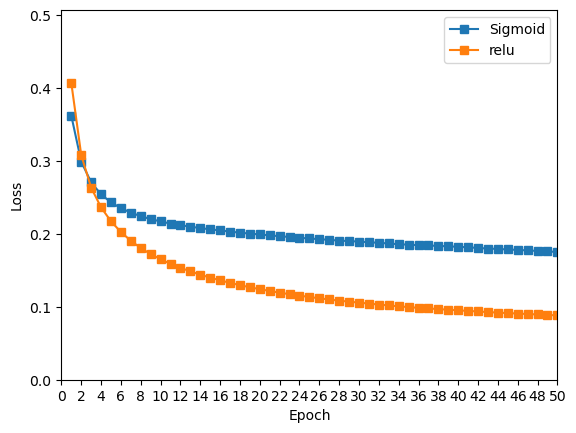

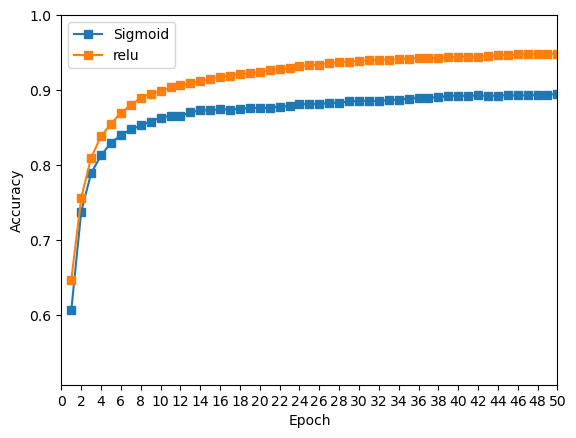

In [13]:
plot_loss_and_acc({'Sigmoid': [sigmoid_loss, sigmoid_acc],
                   'relu': [relu_loss, relu_acc]})

## 2. MLP with Softmax Cross-Entropy Loss
In part-2, you need to train a MLP with **Softmax Cross-Entropy Loss**.  
**Sigmoid Activation Function** and **ReLU Activation Function** will be used respectively again.
### TODO
Before executing the following code, you should complete **criterion/softmax_cross_entropy_loss.py**.

In [14]:
from criterion import SoftmaxCrossEntropyLossLayer

criterion = SoftmaxCrossEntropyLossLayer()

sgd = SGD(learning_rate_SGD, weight_decay)

## 2.1 MLP with Softmax Cross-Entropy Loss and Sigmoid Activation Function
Build and train a MLP contraining one hidden layer with 128 units using Sigmoid activation function and Softmax cross-entropy loss function.

In [15]:
sigmoidMLP = Network()
# Build MLP with FCLayer and SigmoidLayer
# 128 is the number of hidden units, you can change by your own
sigmoidMLP.add(FCLayer(784, 128))
sigmoidMLP.add(SigmoidLayer())
sigmoidMLP.add(FCLayer(128, 10))

### Train

In [16]:
sigmoidMLP, sigmoid_loss, sigmoid_acc = train(sigmoidMLP, criterion, sgd, data_train, max_epoch, batch_size, disp_freq)

Epoch [0][50]	 Batch [0][429]	 Training Loss 2.5309	 Accuracy 0.1406
Epoch [0][50]	 Batch [100][429]	 Training Loss 2.3421	 Accuracy 0.1627
Epoch [0][50]	 Batch [200][429]	 Training Loss 2.2569	 Accuracy 0.2311
Epoch [0][50]	 Batch [300][429]	 Training Loss 2.1938	 Accuracy 0.2941
Epoch [0][50]	 Batch [400][429]	 Training Loss 2.1376	 Accuracy 0.3484

Epoch [0]	 Average training loss 2.1220	 Average training accuracy 0.3631
Epoch [0]	 Average validation loss 1.8698	 Average validation accuracy 0.6082

Epoch [1][50]	 Batch [0][429]	 Training Loss 1.9104	 Accuracy 0.5547
Epoch [1][50]	 Batch [100][429]	 Training Loss 1.8318	 Accuracy 0.6037
Epoch [1][50]	 Batch [200][429]	 Training Loss 1.7991	 Accuracy 0.6127
Epoch [1][50]	 Batch [300][429]	 Training Loss 1.7649	 Accuracy 0.6264
Epoch [1][50]	 Batch [400][429]	 Training Loss 1.7292	 Accuracy 0.6391

Epoch [1]	 Average training loss 1.7182	 Average training accuracy 0.6442
Epoch [1]	 Average validation loss 1.5232	 Average validation acc

### Test

In [17]:
test(sigmoidMLP, criterion, data_test, batch_size, disp_freq)

Testing...
The test accuracy is 0.9057.



## 2.2 MLP with Softmax Cross-Entropy Loss and ReLU Activation Function
Build and train a MLP contraining one hidden layer with 128 units using ReLU activation function and Softmax cross-entropy loss function.

In [18]:
reluMLP = Network()
# Build ReLUMLP with FCLayer and ReLULayer
# 128 is the number of hidden units, you can change by your own
reluMLP.add(FCLayer(784, 128))
reluMLP.add(ReLULayer())
reluMLP.add(FCLayer(128, 10))

In [19]:
reluMLP, relu_loss, relu_acc = train(reluMLP, criterion, sgd, data_train, max_epoch, batch_size, disp_freq)

Epoch [0][50]	 Batch [0][429]	 Training Loss 2.6005	 Accuracy 0.0703
Epoch [0][50]	 Batch [100][429]	 Training Loss 2.0838	 Accuracy 0.2710
Epoch [0][50]	 Batch [200][429]	 Training Loss 1.8065	 Accuracy 0.4248
Epoch [0][50]	 Batch [300][429]	 Training Loss 1.6122	 Accuracy 0.5132
Epoch [0][50]	 Batch [400][429]	 Training Loss 1.4630	 Accuracy 0.5715

Epoch [0]	 Average training loss 1.4254	 Average training accuracy 0.5853
Epoch [0]	 Average validation loss 0.8087	 Average validation accuracy 0.8253

Epoch [1][50]	 Batch [0][429]	 Training Loss 1.0855	 Accuracy 0.7266
Epoch [1][50]	 Batch [100][429]	 Training Loss 0.8268	 Accuracy 0.7938
Epoch [1][50]	 Batch [200][429]	 Training Loss 0.7964	 Accuracy 0.8011
Epoch [1][50]	 Batch [300][429]	 Training Loss 0.7693	 Accuracy 0.8074
Epoch [1][50]	 Batch [400][429]	 Training Loss 0.7427	 Accuracy 0.8131

Epoch [1]	 Average training loss 0.7334	 Average training accuracy 0.8152
Epoch [1]	 Average validation loss 0.5279	 Average validation acc

In [20]:
test(reluMLP, criterion, data_test, batch_size, disp_freq)

Testing...
The test accuracy is 0.9457.



## Plot

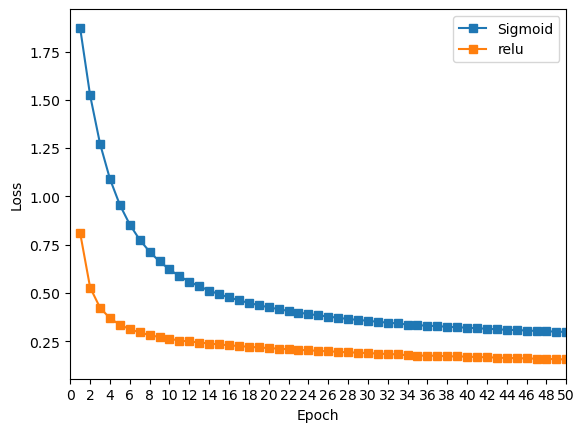

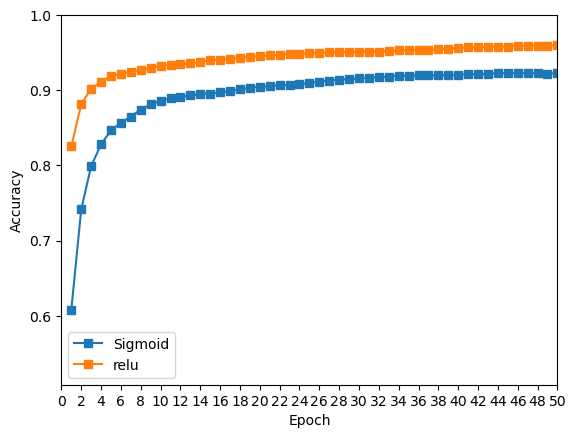

In [21]:
plot_loss_and_acc({'Sigmoid': [sigmoid_loss, sigmoid_acc],
                   'relu': [relu_loss, relu_acc]})

### ~~You have finished homework X2, congratulations!~~  

**Next, according to the requirements 4) of report:**
### **You need to construct a two-hidden-layer MLP, using any activation function and loss function.**

**Note: Please insert some new cells blow (using '+' bottom in the toolbar) refer to above codes. Do not modify the former code directly.**

In [22]:
from criterion import SoftmaxCrossEntropyLossLayer

criterion = SoftmaxCrossEntropyLossLayer()

sgd = SGD(learning_rate_SGD, weight_decay)

In [23]:
myMLP = Network()
myMLP.add(FCLayer(784, 256))
myMLP.add(ReLULayer())
myMLP.add(FCLayer(256, 128))
myMLP.add(ReLULayer())
myMLP.add(FCLayer(128, 10))
criterion = SoftmaxCrossEntropyLossLayer()

In [24]:
myMLP, my_loss, my_acc = train(myMLP, criterion, sgd, data_train, max_epoch, batch_size, disp_freq)

Epoch [0][50]	 Batch [0][429]	 Training Loss 2.7132	 Accuracy 0.0391
Epoch [0][50]	 Batch [100][429]	 Training Loss 2.0392	 Accuracy 0.3120
Epoch [0][50]	 Batch [200][429]	 Training Loss 1.7164	 Accuracy 0.4736
Epoch [0][50]	 Batch [300][429]	 Training Loss 1.4869	 Accuracy 0.5645
Epoch [0][50]	 Batch [400][429]	 Training Loss 1.3183	 Accuracy 0.6218

Epoch [0]	 Average training loss 1.2778	 Average training accuracy 0.6354
Epoch [0]	 Average validation loss 0.6095	 Average validation accuracy 0.8632

Epoch [1][50]	 Batch [0][429]	 Training Loss 0.9370	 Accuracy 0.7109
Epoch [1][50]	 Batch [100][429]	 Training Loss 0.6355	 Accuracy 0.8373
Epoch [1][50]	 Batch [200][429]	 Training Loss 0.6136	 Accuracy 0.8406
Epoch [1][50]	 Batch [300][429]	 Training Loss 0.5919	 Accuracy 0.8456
Epoch [1][50]	 Batch [400][429]	 Training Loss 0.5711	 Accuracy 0.8500

Epoch [1]	 Average training loss 0.5640	 Average training accuracy 0.8516
Epoch [1]	 Average validation loss 0.3885	 Average validation acc

In [25]:
test(myMLP, criterion, data_test, batch_size, disp_freq)

Testing...
The test accuracy is 0.9625.



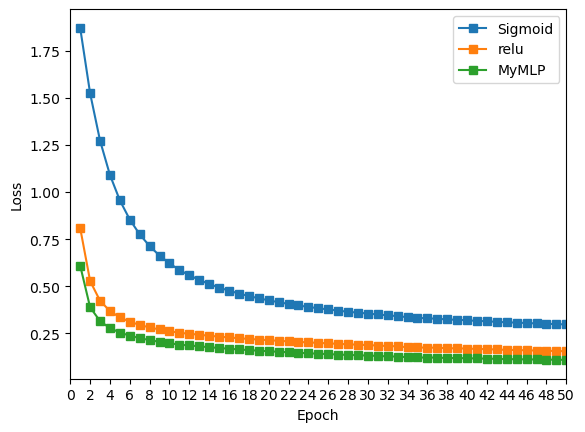

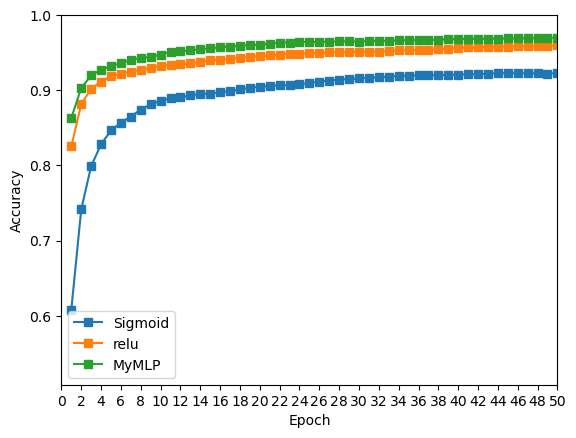

In [26]:
plot_loss_and_acc({'Sigmoid': [sigmoid_loss, sigmoid_acc],
                   'relu': [relu_loss, relu_acc], 
                   'MyMLP': [my_loss, my_acc]})